In [1]:
from __future__ import division
import sys
home_dir=!echo "$HOME"
sys.path.insert(2,home_dir[0]+'/iPyNb/NERSC_Import') 
from pyROOT_import import *
from pyNEST import *
from ROOT import TH2D
import scipy as spy
import scipy.stats as stats
from scipy.interpolate import interp2d
%pylab inline
pylab.rcParams['figure.figsize'] = (12.0, 8.0) # set size of figures"
plt.rcParams.update({'font.size': 24})

TROOT::Append:0: RuntimeWarning: Replacing existing TH1: LCE (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: EField (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: LCE (Potential memory leak).


Populating the interactive namespace from numpy and matplotlib


TROOT::Append:0: RuntimeWarning: Replacing existing TH1: EField (Potential memory leak).
`%matplotlib` prevents importing * from pylab and numpy


In [2]:
#WS cuts
S1_min=0
S1_max=20
S2raw_min=450
#NS1_coin_req=3

#define. calc LZ  nominal exposure
def calc_exposure(S1_cut, S2_cut, S1_win_max=20):
    LZ_count=sum(S1_cut<S1_win_max)/Det_exposure_factor
    LZ_count_underNr=sum((S1_cut<S1_win_max) & (log10(S2_cut/S1_cut)<sNR(S1_cut)))/Det_exposure_factor
    sig_LZ_count=sqrt(sum(S1_cut<S1_win_max))/Det_exposure_factor
    sig_LZ_count_underNr=sqrt(sum((S1_cut<20) & (log10(S2_cut/S1_cut)<sNR(S1_cut))))/Det_exposure_factor
    print('Count (0 to '+str(S1_win_max) + ' S1) = '+'{:.3f}'.format(LZ_count) + ' +/- ' + '{:.3f}'.format(sig_LZ_count) )
    print('Count below NR mean (0 to '+str(S1_win_max) + ' S1) = '+'{:.3f}'.format(LZ_count_underNr) + ' +/- ' + '{:.3f}'.format(sig_LZ_count_underNr) )

In [11]:
#LZ
NEST =NEST_setup(Det='LUX', nFold=3, g1=0.075, e_lifetime=850, eff_extract=0.95, custom=False)
S2raw_min=150

In [ ]:
# B8 data for threshold contour (start at 1 keV)
file_path='data/B8_Peter.txt' #
ParticleType=0 #'NR'
nSim=2e6

NEST.SetParticleType(ParticleType)
Er, Nph, Ne, S1, S2, S1c, S2c, Rate_evts_kg_day, Det_exposure_factor = dN2S1S2(NEST=NEST, file_path=file_path, nSim=nSim)

WS_cut=(S1c>0) & (S2>=S2raw_min)
S1_cut=S1c[WS_cut]
S2_cut=S2c[WS_cut]

n=40

Nph_thr=[]
Ne_thr=[]
#doing the S1 and S2 threshold independently
for ii in range(n):
    Nph_thr.append(sum((Nph==ii) & (S1c>0) )/sum(Nph==ii))
    Ne_thr.append(sum((Ne==ii) & (S2>S2raw_min) )/sum(Ne==ii))

Thr=zeros((n,n))
for ii in range(n):
    for jj in range(n):
        Thr[ii,jj]=sum((Nph==ii) & (Ne==jj) & (WS_cut) )/sum((Nph==ii) & (Ne==jj))


#make the density plot
file_path='data/B8_Peter_lowE.txt'
title='B8_Rick'
ParticleType=0 #'NR'
nSim=7.7e5

NEST.SetParticleType(ParticleType)
Er, Nph, Ne, S1, S2, S1c, S2c, Rate_evts_kg_day, Det_exposure_factor = dN2S1S2(NEST=NEST, file_path=file_path, nSim=nSim)

WS_cut=(S1c>0) & (S2>=S2raw_min)
S1_cut=S1c[WS_cut]
S2_cut=S2c[WS_cut]


/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:19: RuntimeWarning: invalid value encountered in long_scalars
/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:20: RuntimeWarning: invalid value encountered in long_scalars


In [ ]:
title='B8_1000-TonYear-LUX'
plt.rcParams.update({'font.size': 20})


cmap=plt.cm.jet
cmap.set_under(color='w')
#make a scatter plot

fig = plt.figure(figsize=(12, 10))
gs = plt.GridSpec(4, 4)

ax1 = fig.add_subplot(gs[0, 1:])
plt.plot(range(n),Nph_thr,linewidth=3,color='k')
ylim([1e-4,1])
yscale('log')
xlim([0,35])
ax=gca()
#ax.set_yticks([-4,-3,-2,-1,0])
#ax.set_xticklabels([])
ylabel('Threshold')
grid('on')

ax2 = fig.add_subplot(gs[1:, 0])
plt.plot(Ne_thr,range(n),linewidth=3,color='k')
xlim([1e-4,1])
xscale('log')
plt.gca().invert_xaxis()
#plt.gca().invert_yaxis()
ylim([0,35])
plt.ylabel('Electrons')
#ax=gca()
#ax.set_xticks([-4,-3,-2,-1,0])
xlabel('Threshold')
grid('on')

ax3 = fig.add_subplot(gs[1:, 1:])
plt.hist2d(Nph, Ne, bins=np.arange(0,40,1), norm=mpl.colors.LogNorm(), cmap=cmap, vmin=1,)
# Now adding the colorbar
plt.colorbar(fraction=0.05, pad=-0.05,label='Count')
ax=gca()
ax.set_yticklabels([])

plt.xlabel('Photons')
#plt.ylabel('Electrons')
xlim([0,35])
ylim([0,35])
yticks=([])

savefig('figs/'+title+'_NphNe.png',dpi=200)
savefig('figs/'+title+'_NphNe.pdf')



fig = plt.figure(figsize=(10, 8))
plt.rcParams.update({'font.size': 20})

plt.hist2d(Nph[WS_cut], Ne[WS_cut],bins=np.arange(0,40,1), cmap=cmap, vmin=1,)
plt.colorbar(label='Count')
plt.xlabel('Photons')
plt.ylabel('Electrons')

savefig('figs/'+title+'_NphNe_cut.png',dpi=200)
savefig('figs/'+title+'_NphNe_cut.pdf')

/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':


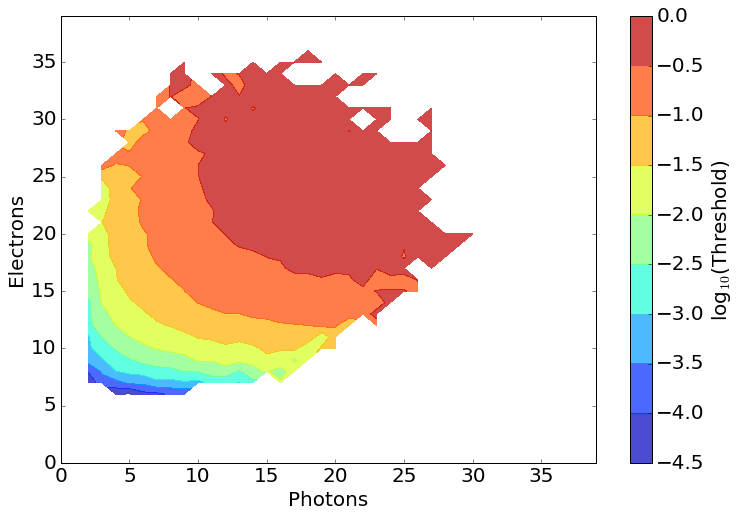

In [261]:
plt.contourf(log10(Thr.T),[-4.5,-4,-3.5,-3,-2.5,-2,-1.5,-1,-.5,0],alpha=0.7)
plt.colorbar(label=r'log$_{10}$(Threshold)')
plt.xlabel('Photons')
plt.ylabel('Electrons')

savefig('figs/'+title+'_NphNe_Thresh.png',dpi=200)
savefig('figs/'+title+'_NphNe_Thresh.pdf')

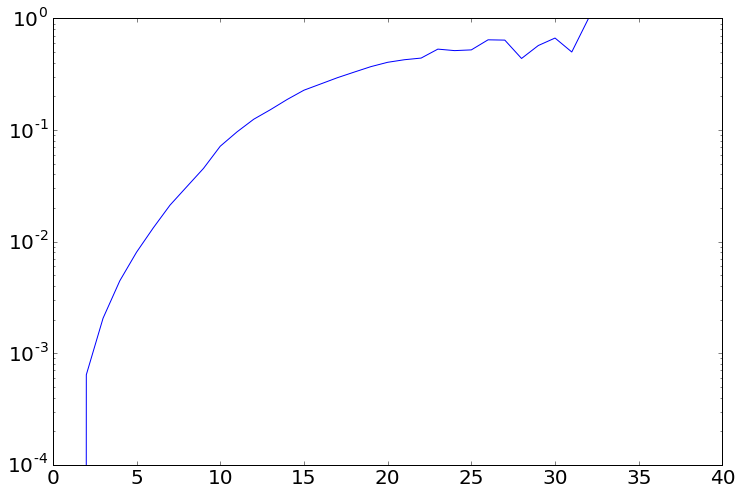

In [260]:
plt.plot(range(n),Nph_thr)
ylim([1e-4,1])
yscale('log')

In [265]:
sum(WS_cut==1)

496